Correlation matrix:
            Resistance    Cement  Additives     Water
Resistance    1.000000  0.785701   0.646000  0.103590
Cement        0.785701  1.000000   0.766206  0.084486
Additives     0.646000  0.766206   1.000000  0.558672
Water         0.103590  0.084486   0.558672  1.000000

Means of the columns:
Resistance    253.406468
Cement        255.658905
Additives       2.419888
Water         211.665535
dtype: float64

Primary Model:
                            OLS Regression Results                            
Dep. Variable:             Resistance   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     439.9
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          9.34e-169
Time:                        17:16:44   Log-Likelihood:                -4054.1
No. Observations:                 804   AIC:                             8116.
Df 

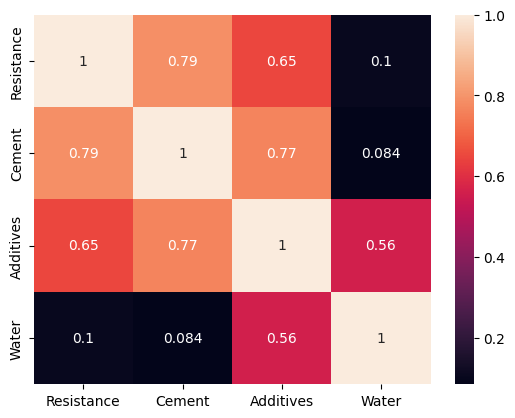

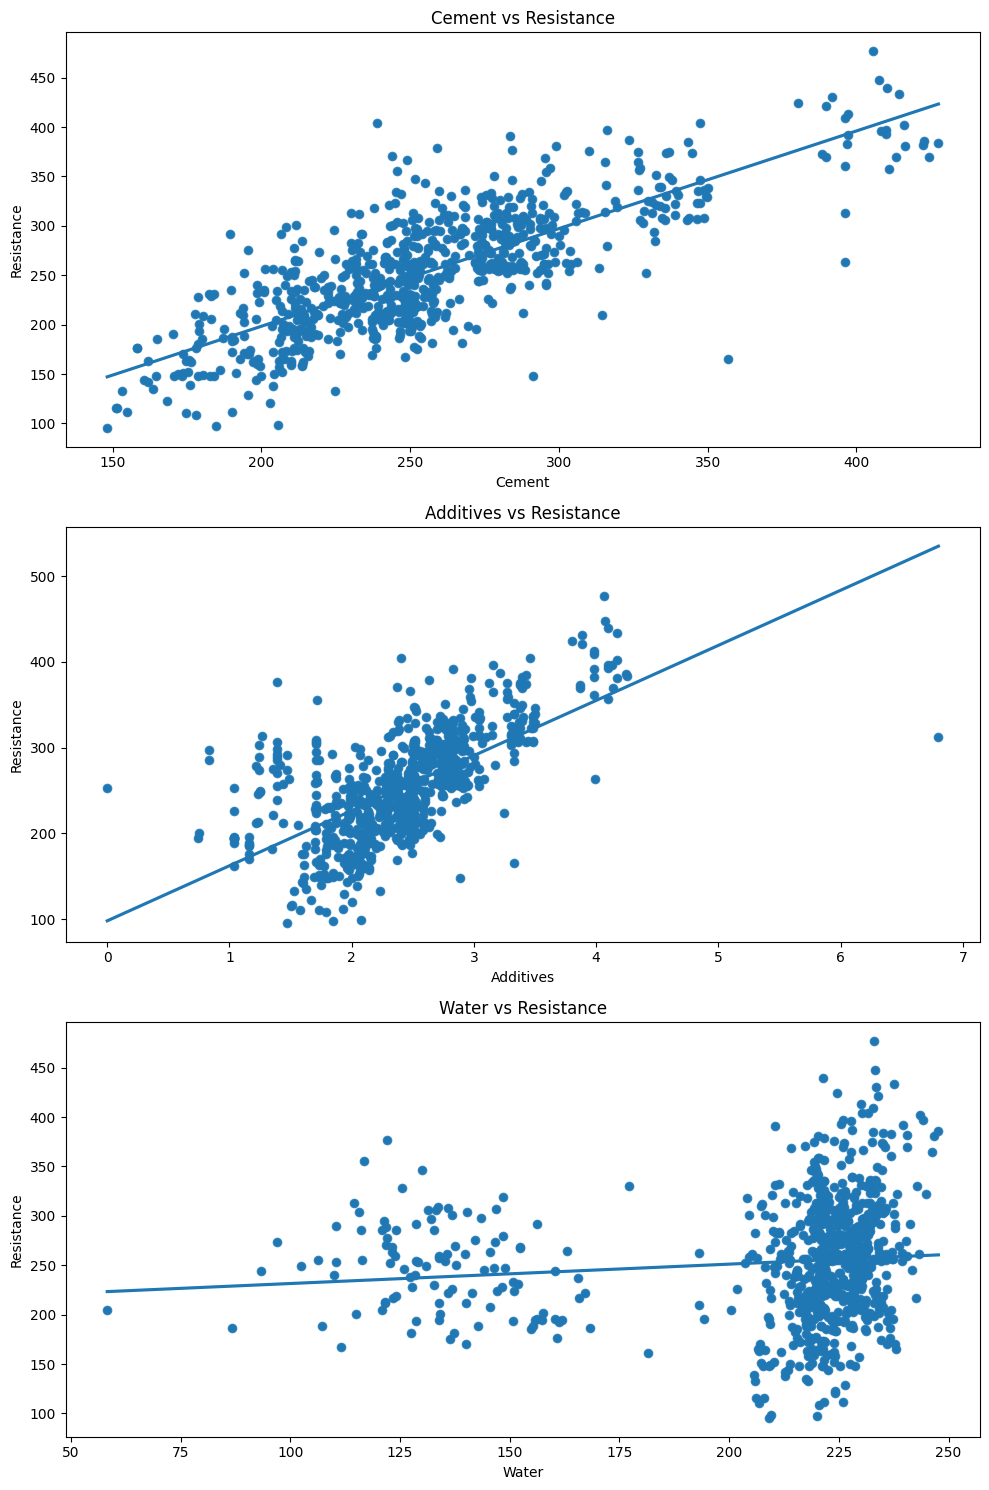

Model without the Water column
                            OLS Regression Results                            
Dep. Variable:             Resistance   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     659.1
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          6.02e-170
Time:                        17:16:45   Log-Likelihood:                -4054.8
No. Observations:                 804   AIC:                             8116.
Df Residuals:                     801   BIC:                             8130.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3409

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Open the CSV file with delimiter ';'
df = pd.read_csv("concrete_(CEMEX).csv", delimiter=';')

# Remove NAN columns
df = df.dropna(axis=1)

# Convert specific columns to float after replacing ',' with '.'
columns_to_convert = ['Resistance', 'Cement', 'Additives', 'Water']
for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '.').astype(float)

# Remove 'Observation' column
df = df.drop('Observation', axis=1)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix, end="\n\n")

# Display the heatmap
sns.heatmap(correlation_matrix, annot=True)

# Means of the columns
means = df.mean()

print("Means of the columns:")
print(means, end="\n\n")

# Linear regression model using statsmodels
X = df.drop('Resistance', axis=1)  # Features
y = df['Resistance']  # Target

# Add a constant (intercept) to the model
X_with_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_with_const).fit()

# Display the model summary
print("Primary Model:")
print(model.summary())

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the cement vs resistance
sns.scatterplot(ax=axes[0], x='Cement', y='Resistance', data=df)
sns.regplot(ax=axes[0], x='Cement', y='Resistance', data=df, ci=None)
axes[0].set_title('Cement vs Resistance')

# Plot the additives vs resistance
sns.scatterplot(ax=axes[1], x='Additives', y='Resistance', data=df)
sns.regplot(ax=axes[1], x='Additives', y='Resistance', data=df, ci=None)
axes[1].set_title('Additives vs Resistance')

# Plot the water vs resistance
sns.scatterplot(ax=axes[2], x='Water', y='Resistance', data=df)
sns.regplot(ax=axes[2], x='Water', y='Resistance', data=df, ci=None)
axes[2].set_title('Water vs Resistance')

# Adjust layout
plt.tight_layout()
plt.show()

# New model without the Water column
print("Model without the Water column")
X = df.drop(['Resistance', 'Water'], axis=1)  # Features
X_with_const = sm.add_constant(X)

# Fit the model
model_two = sm.OLS(y, X_with_const).fit()

# Display the model summary
print(model_two.summary())

# New model without the Additives column
print("Model without the Additives column")
X = df.drop(['Resistance', 'Additives'], axis=1)  # Features
X_with_const = sm.add_constant(X)

# Fit the model
model_three = sm.OLS(y, X_with_const).fit()

# Display the model summary
print(model_three.summary())

# New model without the Cement column
print("Model without the Cement column")
X = df.drop(['Resistance', 'Cement'], axis=1)  # Features
X_with_const = sm.add_constant(X)

# Fit the model
model_four = sm.OLS(y, X_with_const).fit()

# Display the model summary
print(model_four.summary())
